In [78]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import os

In [79]:
work_dir = os.getcwd()
work_dir

'C:\\Users\\Evan\\Documents\\GitHub\\FuturesStrategy'

## Read the Data

In [80]:
Data_path = os.path.join(work_dir, 'Data')
TX = pd.read_csv(os.path.join(Data_path, 'TX.csv'), encoding = 'cp950')
OI = pd.read_csv(os.path.join(Data_path, 'OpenInterest.csv'), encoding = 'cp950')

In [81]:
TX.shape

(4116, 8)

In [83]:
OI.shape

(735, 4)

In [82]:
OI.tail()

,日期,自營商－小型臺指期,外資－小型臺指期,投信－小型臺指期
730,2020/4/16,"1,413,602","1,575,209","42,234"
731,2020/4/17,"2,244,324","-367,902","42,780"
732,2020/4/20,"1,756,390","-2,425,912","34,568"
733,2020/4/21,"1,538,302","-2,029,498","33,647"
734,2020/4/22,"914,106","-2,022,450","32,710"


## We take out the closest delivery TX as out underlying. 

In [84]:
TX00 = TX.drop_duplicates(subset = ['日期'], keep = 'first').reset_index(drop=True)

In [85]:
TX00.head()

,期貨名稱,日期,到期月,開盤價,收盤價,每日結算價,未平倉合約數,無風險利率
0,TX201705 台指 2017/05,2017/4/24,May-17,9747.0,9705.0,9706,86630,1.045
1,TX201705 台指 2017/05,2017/4/25,May-17,9746.0,9813.0,9814,88368,1.045
2,TX201705 台指 2017/05,2017/4/26,May-17,9855.0,9841.0,9842,88047,1.045
3,TX201705 台指 2017/05,2017/4/27,May-17,9829.0,9839.0,9838,88742,1.045
4,TX201705 台指 2017/05,2017/4/28,May-17,9847.0,9857.0,9856,88286,1.045


In [67]:
TX_0.dtypes

期貨名稱       object
日期         object
到期月        object
開盤價       float64
收盤價       float64
每日結算價       int64
未平倉合約數      int64
無風險利率     float64
dtype: object

## Show the TX first 

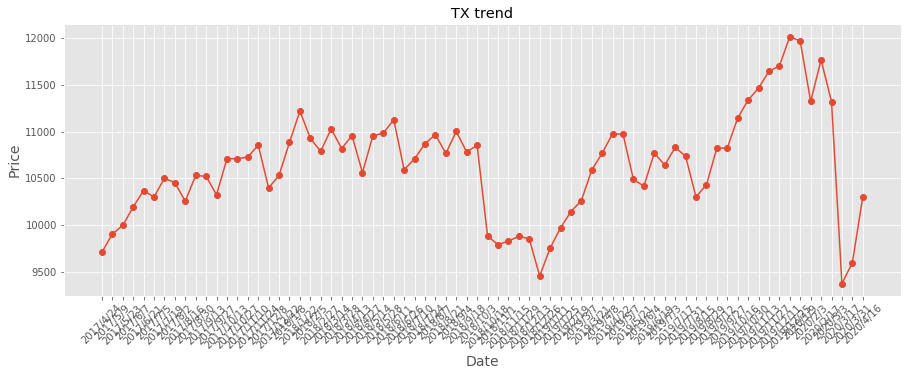

In [76]:
date = TX_0.iloc[::10, :]['日期']
closePrice = TX_0.iloc[::10, :]['每日結算價']

plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.plot(date, closePrice, marker='o')
title_name = "TX trend"
plt.title(title_name)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=45) 
plt.ylabel('Price', fontsize=14)
plt.savefig(os.path.join(work_dir, 'Graph', title_name))
plt.show()